# **Customer Profiling and Segmentation**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Contents or Attributes**

**People**

*  ID : Customer's unique identifier.
*  Year_Birth : Customer's birth year.
*  Education : Customer's education level.
*  Marital_Status : Customer's marital status.
*  Income : Customer's yearly household income.
*  Kidhome : Number of children in customer's household.
*  Teenhome : Number of teenagers in customer's household.
*  Dt_Customer : Date of customer's enrollment with the company.
*  Recency : Number of days since customer's last purchase
*  Complain : 1 if the customer complained in the last 2 years, 0 otherwise














**Products**


*   MntWines: Amount spent on wine in last 2 years.
*   MntFruits: Amount spent on fruits in last 2 years.
*   MntMeatProducts: Amount spent on meat in last 2 years.
*   MntFishProducts: Amount spent on fish in last 2 years.
*   MntSweetProducts: Amount spent on sweets in last 2 years.
*   MntGoldProds: Amount spent on gold in last 2 years.






**Promotion**


*   NumDealsPurchases: Number of purchases made with a discount.
*   AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.
*   AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.
*  AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.
*   AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.
*   AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.
*   Response: 1 if customer accepted the offer in the last campaign, 0 otherwise.

**Place**

*   NumWebPurchases: Number of purchases made through the company’s website.
*   NumCatalogPurchases: Number of purchases made using a catalogue.
*   NumStorePurchases: Number of purchases made directly in stores.
*   NumWebVisitsMonth: Number of visits to company’s website in the last month.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats.mstats import winsorize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/marketing_campaign.csv", sep='\t')
pd.options.display.max_rows = 15000
pd.options.display.max_columns = 30

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.head(25)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe(include="all")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df['Z_CostContact'].value_counts()

,count
Z_CostContact,
3,2240


In [ ]:
df['Z_Revenue'].value_counts()

,count
Z_Revenue,
11,2240


In [ ]:
for column in df.columns:
  if (column == 'ID') or (column == 'Year_Birth') or (column == 'Income') or (column == 'Dt_Customer') or (column == 'MntFishProducts') or (column == 'Recency') or (column == 'MntWines') or (column == 'MntFruits') or (column == 'MntMeatProducts') or (column == 'MntSweetProducts') or (column == 'MntGoldProds') :
    continue
  else:
    print(df[column].value_counts())

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64
Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64
NumDealsPurchases
1     970
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
11      5
10      5
12      4
13      3
Name: count, dtype: int64
NumWebPurchases
2     373
1     354
3     336
4     280
5     220
6     205
7     155
8     102
9      75
0      49
11     44
10     43
27      2
23      1
25      1
Name: count, dtype: int64
NumCatalogPurchases
0     586
1     497
2     276
3     184
4     182
5     140
6     128
7      79
8      55
10     48
9      42
11     19
28      3
22      1
Name: count, dtype: int64

<ipython-input-13-f114736db25f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = m_status['count'] , palette = colors , x = m_status['Marital_Status'] , edgecolor = 'black')
<ipython-input-13-f114736db25f>:4: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(y = m_status['count'] , palette = colors , x = m_status['Marital_Status'] , edgecolor = 'black')


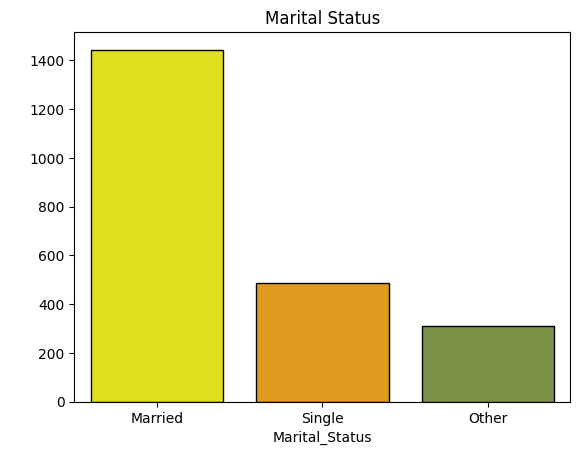

,Marital_Status,count
0,Married,1444
1,Single,485
2,Other,311


In [ ]:
df["Marital_Status"]=df["Marital_Status"].replace({"Together":"Married","Alone":"Single","YOLO":"Single","Divorced":"Other","Widow":"Other","Absurd":"Other"})
m_status = df['Marital_Status'].value_counts().reset_index()
colors = ['yellow' , 'orange' , '#809D3C' , 'pink' , 'skyblue'  ,'lightgreen'  , '#BAD8B6' ,  '#E82561' , '#B6CBBD' , '#FAFFC5']
sns.barplot(y = m_status['count'] , palette = colors , x = m_status['Marital_Status'] , edgecolor = 'black')
plt.title('Marital Status')
plt.ylabel(' ')
plt.show()
m_status

The majority of customers are married (1444), followed by singles (485) and others (311). This indicates that household dynamics, such as family-oriented spending habits, may influence purchasing behavior. Marketing strategies and product offerings can be optimized to target married individuals, who represent the largest segment, potentially driving higher engagement and sales.

In [ ]:
pivot_table1= pd.pivot_table(df,index = ['Kidhome'] , values = ['MntWines','MntFruits' , 'MntMeatProducts' , 'MntFishProducts' , 'MntSweetProducts' , 'MntGoldProds'],aggfunc="sum")
print(df['Kidhome'].value_counts())
pivot_table1


Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64


,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Kidhome,,,,,,
0,72618,50935,77628,328417,52365,583367
1,11068,7657,20145,43927,8030,93859
2,371,325,836,1624,226,3590


In [ ]:
pivot_table2 = pd.pivot_table(df,index = ['Teenhome'] , values = ['MntWines','MntFruits' , 'MntMeatProducts' , 'MntFishProducts' , 'MntSweetProducts' , 'MntGoldProds'],aggfunc="sum")
print(df['Kidhome'].value_counts())
pivot_table2

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64


,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Teenhome,,,,,,
0,56346,38573,52407,263005,38945,352985
1,26468,19433,43865,104475,20840,309010
2,1243,911,2337,6488,836,18821


In [ ]:
pivot_table3= pd.pivot_table(df,index=['Teenhome'],values=['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases'],aggfunc="sum")
pivot_table3

,NumCatalogPurchases,NumStorePurchases,NumWebPurchases
Teenhome,,,
0,3464,6528,4240
1,2374,6117,4661
2,125,325,249


In [ ]:
pivot_table4 = pd.pivot_table(df,index=['Kidhome'],values=['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases'],aggfunc="sum")
pivot_table4

,NumCatalogPurchases,NumStorePurchases,NumWebPurchases
Kidhome,,,
0,5118,9332,6431
1,811,3473,2585
2,34,165,134


In [ ]:
df["Children"]=df[["Kidhome","Teenhome"]].sum(axis=1)
df=df.drop(["Kidhome","Teenhome"],axis=1)

Redundant columns repeat information and are not needed. Kidhome and Teenhome were combined into Children to simplify the data. This makes analysis easier, saves space, and improves efficiency.

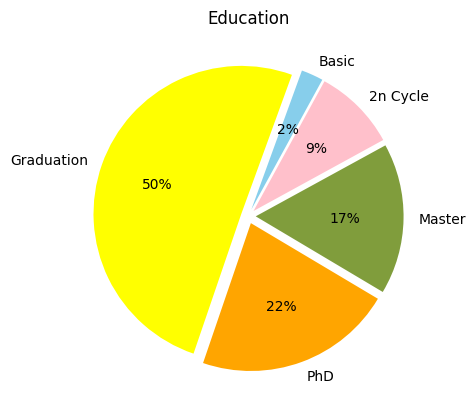

In [ ]:
education=df["Education"].value_counts()
explode=[0] * len(education)
for i in range(len(education)):
  explode[i]=0.05
plt.pie(education.values, labels = education.index,explode=explode,colors=colors,autopct='%1.0f%%' , startangle = 70)
plt.title('Education')
plt.show()

Our analysis revealed a high proportion of individuals with Graduation degrees (50%), followed by Master's and PhDs (39%). This suggests a well-educated population with diverse levels of expertise

<Axes: xlabel='Year_Birth', ylabel='Count'>

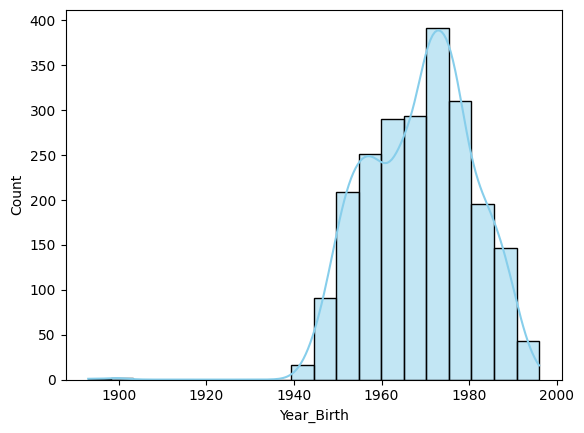

In [ ]:
sns.histplot(df["Year_Birth"],bins=20, edgecolor='black', color='skyblue' , kde = True)


The histogram shows that most customers were born between 1940 and 1995, with a peak around 1970-1980. There are fewer younger and very old customers, meaning the business mainly serves middle-aged individuals. This insight can help in creating targeted marketing strategies.









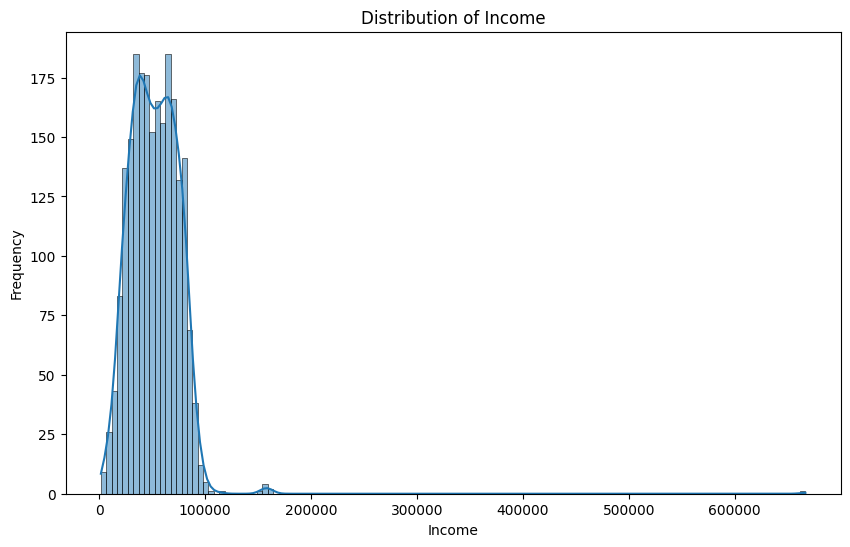

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Distribution of Income")
plt.show()

The income distribution is right-skewed, meaning most customers earn less than 100,000, while a few have much higher incomes. Some extreme values above 200,000 exist, which may affect the analysis. This suggests the business mainly serves middle-income customers, with a small group of high earners.

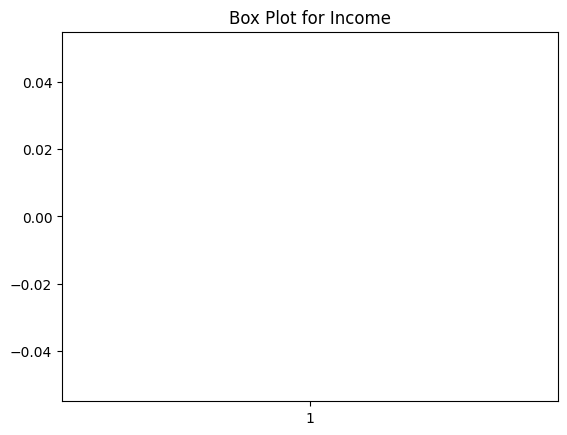

In [ ]:
plt.boxplot(x = df['Income'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for Income')
plt.show()

The box plot shows that most customers have an income within a certain range, but there are several outliers with significantly higher incomes. A few extreme values, including one above 600,000, indicate a highly skewed distribution. This suggests that while the majority of customers belong to a middle-income group, a small number of high-income individuals may influence the overall analysis. Handling these outliers appropriately is important for accurate insights.

In [ ]:
df['Income'].fillna(df['Income'].mean() , inplace = True)

<ipython-input-23-60ac9316f92a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].mean() , inplace = True)


The code fills missing values in the Income column with the mean income of the dataset. This approach ensures data completeness and consistency, preventing any loss of information. It is a commonly used method to handle missing values, especially when the amount of missing data is small.

**Distribution of Customers by the Number of Discounted Purchases**

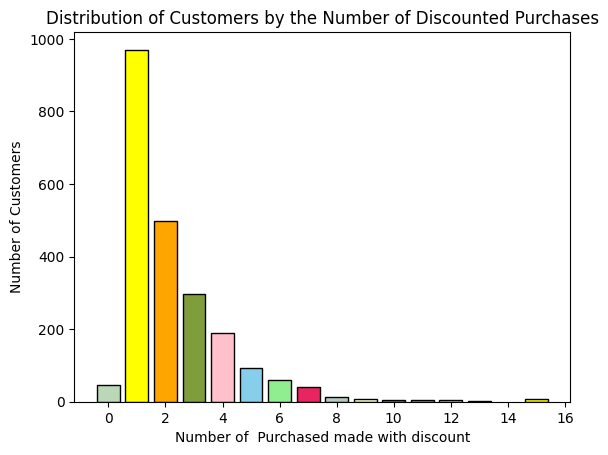

,count
NumDealsPurchases,
1,970
2,497
3,297
4,189
5,94
6,61
0,46
7,40
8,14


In [ ]:

NumDealsPurchases_count=df["NumDealsPurchases"].value_counts()
plt.bar(NumDealsPurchases_count.index,NumDealsPurchases_count.values,color=colors , edgecolor = 'black')
plt.ylabel("Number of Customers")
plt.xlabel("Number of  Purchased made with discount")
plt.title("Distribution of Customers by the Number of Discounted Purchases")
plt.show()
NumDealsPurchases_count

The distribution indicates that most customers make only one or two discounted purchases, while a smaller group utilizes discounts more frequently. This suggests that while discounts are effective in attracting some buyers, they may not be a key driver of overall purchasing behavior. Businesses may need to explore additional strategies to enhance customer engagement and sales.

In [ ]:
pivot_table5= pd.pivot_table(df,index = ['Education'] , values = ['MntWines','MntFruits' , 'MntMeatProducts' , 'MntFishProducts' , 'MntSweetProducts' , 'MntGoldProds'],aggfunc="sum")
pivot_table5

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Education,,,,,,
2n Cycle,9639,5878,9419,28675,6953,40231
Basic,921,600,1233,618,654,391
Graduation,48630,34683,57307,202284,35351,320371
Master,11877,8012,14947,60450,7835,123238
PhD,12990,9744,15703,81941,9828,196585


Customers with higher education levels spend more across all product categories, especially on Wines, Meat, and Gold Products. Graduates have the highest spending, followed by PhD and Master’s holders. In contrast, those with lower education levels spend significantly less. This suggests that purchasing power increases with education, which businesses can use for targeted marketing and premium product promotions.

**Spending Habits by Marital Status**

In [ ]:
pivot_table6 = pd.pivot_table(df,index = ['Marital_Status'] , values = ['MntWines','MntFruits' , 'MntMeatProducts' , 'MntFishProducts' , 'MntSweetProducts' , 'MntGoldProds'],aggfunc="sum")
pivot_table6

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Marital_Status,,,,,,
Married,53184,36938,61936,236329,38221,436710
Other,12498,9080,15518,50048,9287,104509
Single,18375,12899,21155,87591,13113,139597


Married customers spend the most across all product categories, especially on Wines, Meat, and Gold Products. Single customers spend less but more than those in the Other category. This suggests that married individuals have higher purchasing power, making them a key target for marketing.

**Purchasing Behavior Based on Education Level**

In [ ]:
pivot_table7=pd.pivot_table(df,index=['Education'],values=['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases'],aggfunc="sum")
pivot_table7

,NumCatalogPurchases,NumStorePurchases,NumWebPurchases
Education,,,
2n Cycle,471,1118,757
Basic,26,154,102
Graduation,3072,6570,4649
Master,951,2182,1492
PhD,1443,2946,2150


Purchasing habits differ by education level, with Graduates leading in store, online, and catalog purchases, followed by PhD and Master’s holders. Customers with 2nd Cycle education show moderate activity, while those with Basic education purchase the least. Stores are the most popular channel, followed by online and catalogs. Focusing on Graduates and PhDs can drive sales, while targeted promotions can boost engagement among less active groups.

In [ ]:
pivot_table8 = pd.pivot_table(df,index=['Marital_Status'],values=['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases'],aggfunc="sum")
pivot_table8

,NumCatalogPurchases,NumStorePurchases,NumWebPurchases
Marital_Status,,,
Married,3820,8382,5899
Other,891,1857,1363
Single,1252,2731,1888


Married customers make the highest purchases across catalogs, stores, and websites, followed by single customers and then those in the Other category. This suggests that married individuals are more engaged shoppers, making them a key audience for marketing campaigns across all sales channels.

**Analyzing Purchase Behavior: Channel Distribution**

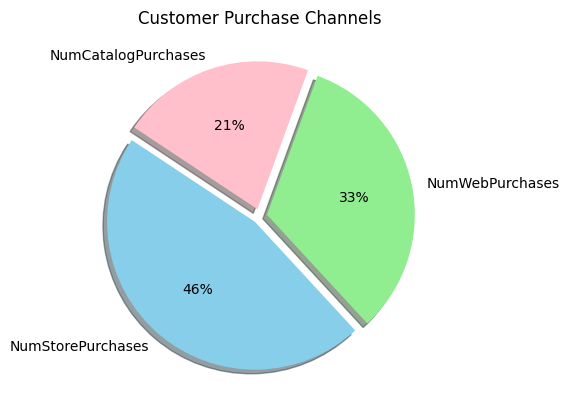

In [ ]:
purchase_sums = df[['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']].sum()
explode=[0] * len(purchase_sums)
for i in range(len(purchase_sums)):
  explode[i]=0.05
plt.pie(purchase_sums,labels=purchase_sums.index,autopct='%1.0f%%', explode=explode,colors=['pink', 'skyblue' ,'lightgreen'], startangle = 70,shadow=True)
plt.title("Customer Purchase Channels")
plt.show()

The pie chart reveals that in-store purchases are the most popular channel, accounting for 46% of total purchases, followed by online purchases at 33%. Catalog purchases represent the smallest segment at 21%. This data suggests a preference for traditional shopping experiences while indicating a significant online presence.

**Campaign Performance Comparison**

Text(0.5, 1.0, 'Customer Acceptance Rates by Campaign Type')

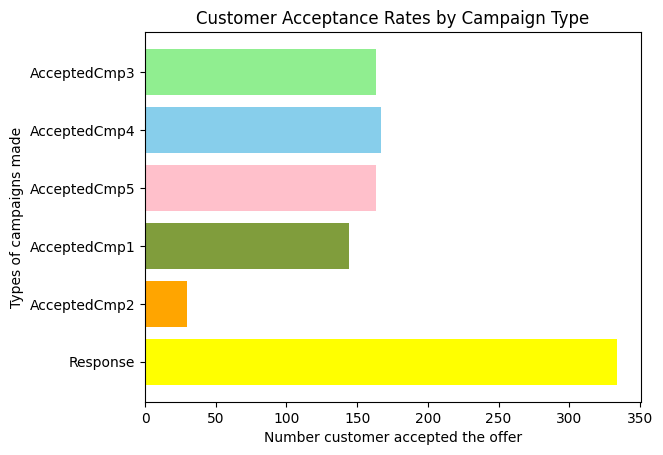

In [ ]:
campaign_check=df[['Response' , 'AcceptedCmp2', 'AcceptedCmp1', 'AcceptedCmp5', 'AcceptedCmp4','AcceptedCmp3']].sum()
plt.barh(campaign_check.index,campaign_check.values,color=colors)
plt.ylabel("Types of campaigns made")
plt.xlabel("Number customer accepted the offer")
plt.title("Customer Acceptance Rates by Campaign Type")

The bar chart illustrates the number of customer acceptances for different types of campaigns, including the most recent campaign labeled "Response." The "Response" campaign demonstrates the highest level of acceptance, surpassing the performance of previous campaigns such as "AcceptedCmp2," "AcceptedCmp1," and those with lower acceptance rates like "AcceptedCmp3," "AcceptedCmp4," and "AcceptedCmp5." This suggests that the latest campaign strategy may have been particularly effective in driving customer engagement and conversion.

**Income Segmentation and Spending Behavior**

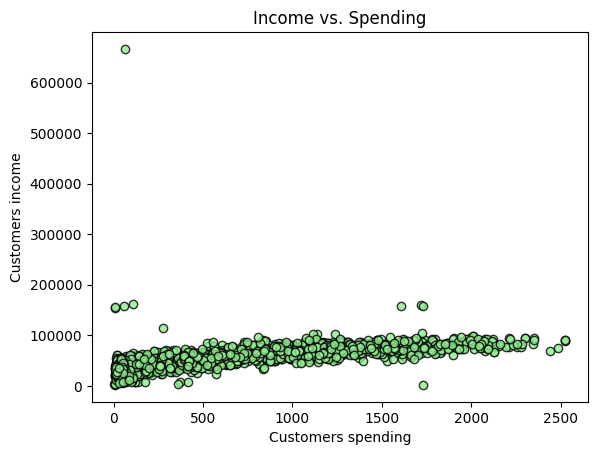

In [ ]:
df['amount_spent']=df[[ 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum(axis=1)
plt.scatter(x=df["amount_spent"] , y=df['Income'] , c = 'lightgreen' , alpha = 0.8 ,  edgecolor = 'black' ,  label = 'amount_spent')
plt.ylabel("Customers income")
plt.xlabel("Customers spending")
plt.title("Income vs. Spending")
plt.show()

The scatter plot shows a positive correlation between income and spending, meaning higher-income customers tend to spend more. However, there are some outliers, including a few customers with extremely high incomes but relatively low spending. This suggests that while income influences spending, other factors like preferences and saving habits may also play a role.

**Uncovering Customer Preferences: Product Category Spending**

In [ ]:
amount=df[[ 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum()
explode3 = [0] * amount
for i in range(len(explode3)):
  explode3[i] = 0.1

<ipython-input-32-f1d4f9a75bb9>:4: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  explode3[i] = 0.1
<ipython-input-32-f1d4f9a75bb9>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  explode3[i] = 0.1


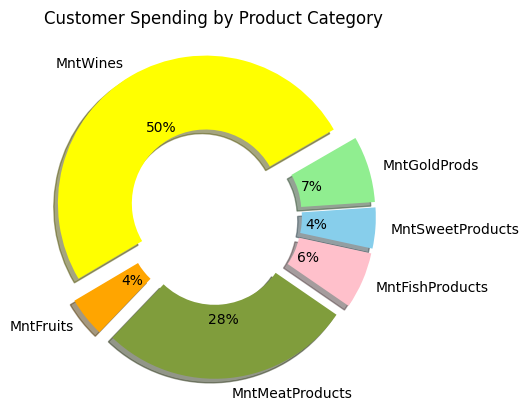

In [ ]:
plt.pie(amount,labels=amount.index,autopct="%1.0f%%",startangle=30,wedgeprops={'width':0.5} , shadow = True , explode = explode3 , colors = colors)
plt.title("Customer Spending by Product Category")
plt.show()

The pie chart illustrates the distribution of spending across various product categories. Wine represents the largest segment with 50% of the total spending, followed by meat products at 28%. The remaining categories, including fruits, gold products, sweet products, and fish products, each account for a smaller portion of the overall spending.

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'].str.strip(), errors='coerce', dayfirst=True)

<ipython-input-35-28a34af5e9d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x = year_count.index, y = year_count.values, palette = ['skyblue' , 'yellow' , 'orange'] , edgecolor = 'black')


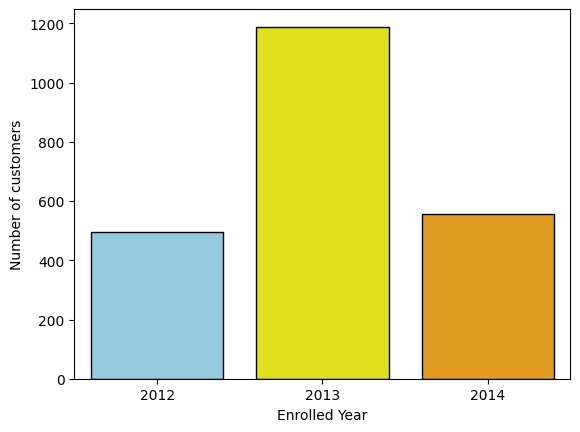

,count
Year,
2013,1189
2014,557
2012,494


In [ ]:
df['Year'] = df['Dt_Customer'].dt.year
year_count=df["Year"].value_counts()
sns.barplot( x = year_count.index, y = year_count.values, palette = ['skyblue' , 'yellow' , 'orange'] , edgecolor = 'black')
plt.xlabel("Enrolled Year")
plt.ylabel("Number of customers")
plt.show()
year_count

Most customers enrolled in 2013, more than in 2012 and 2014. This shows that 2013 was a peak year for new customers, while fewer joined in other years. Understanding this trend can help improve customer growth strategies.









<ipython-input-36-ea79fe8be42f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x = year_count.index, y = year_count.values, palette = ['skyblue' , 'yellow' , 'orange'] , edgecolor = 'black')
<ipython-input-36-ea79fe8be42f>:4: UserWarning: 
The palette list has fewer values (3) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot( x = year_count.index, y = year_count.values, palette = ['skyblue' , 'yellow' , 'orange'] , edgecolor = 'black')


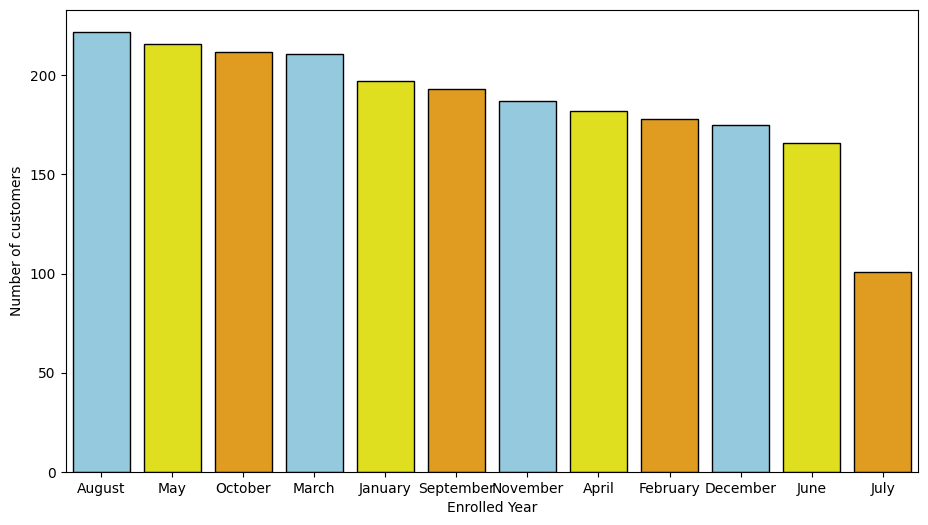

,count
month,
August,222
May,216
October,212
March,211
January,197
September,193
November,187
April,182
February,178


In [ ]:
df['month'] = df['Dt_Customer'].dt.strftime('%B')
year_count=df["month"].value_counts()
plt.figure(figsize = (11,6))
sns.barplot( x = year_count.index, y = year_count.values, palette = ['skyblue' , 'yellow' , 'orange'] , edgecolor = 'black')
plt.xlabel("Enrolled Year")
plt.ylabel("Number of customers")
plt.show()
year_count

Most customers enrolled in August, May, and October, while July had the fewest. This shows a seasonal pattern in sign-ups, which can help in planning promotions.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(df[['Marital_Status']])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Marital_Status']))
encoded_df = encoded_df.astype(int)
df = pd.concat([df, encoded_df], axis=1).drop(columns=['Marital_Status'])

In [ ]:
df=df.drop(["Z_CostContact","Z_Revenue" , 'Dt_Customer'],axis=1)

In [ ]:

education_encoding= {"PhD": 4, "Master": 3, "Graduation": 2, "2n Cycle": 1, "Basic": 0}
month_encoding={"January":1, "February":2, "March":3, "April":4, "May":5,"June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}
df['Education_encoded'] = df['Education'].map(education_encoding)
df["month_encoded"]=df["month"].map(month_encoding)


In [ ]:
df = df.drop(columns=['Education',"month"])

To improve data usability for analysis and machine learning, categorical variables were transformed into numerical representations. One-hot encoding was applied to the Marital_Status column, while Education and Month were mapped to numerical values for better interpretability. Additionally, irrelevant columns such as Z_CostContact, Z_Revenue, and Dt_Customer were removed to maintain data relevance. These preprocessing steps enhance the dataset’s structure, making it more suitable for effective analysis and modeling.

In [ ]:
df.head()

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,amount_spent,Year,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Education_encoded,month_encoded
0,5524,1957,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,1617,2012,0,0,1,2,9
1,2174,1954,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,27,2014,0,0,1,2,3
2,4141,1965,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,776,2013,1,0,0,2,8
3,6182,1984,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,53,2014,1,0,0,2,2
4,5324,1981,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,422,2014,1,0,0,4,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      2240 non-null   int64  
 1   Year_Birth              2240 non-null   int64  
 2   Income                  2240 non-null   float64
 3   Recency                 2240 non-null   int64  
 4   MntWines                2240 non-null   int64  
 5   MntFruits               2240 non-null   int64  
 6   MntMeatProducts         2240 non-null   int64  
 7   MntFishProducts         2240 non-null   int64  
 8   MntSweetProducts        2240 non-null   int64  
 9   MntGoldProds            2240 non-null   int64  
 10  NumDealsPurchases       2240 non-null   int64  
 11  NumWebPurchases         2240 non-null   int64  
 12  NumCatalogPurchases     2240 non-null   int64  
 13  NumStorePurchases       2240 non-null   int64  
 14  NumWebVisitsMonth       2240 non-null   

In [ ]:
df['Education_encoded'].value_counts()

,count
Education_encoded,
2,1127
4,486
3,370
1,203
0,54


**K - means clustering**


In [ ]:
df1 = df.copy() #with outliers
df2 = df.copy() #without outliers


{'whiskers': [<matplotlib.lines.Line2D at 0x7f94e856e550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f94e85e7310>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f94e85c1090>],
 'medians': [<matplotlib.lines.Line2D at 0x7f94e85e6c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f94e6908bd0>],
 'means': []}

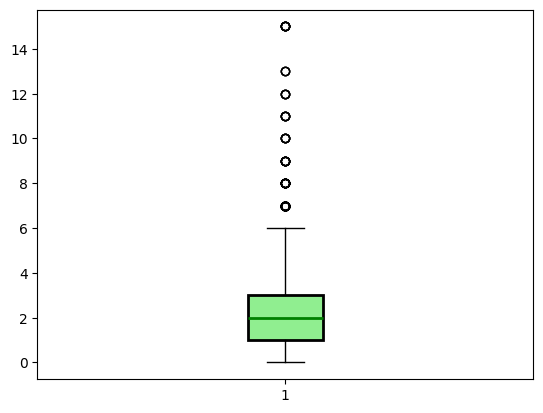

In [ ]:
plt.boxplot(x=df2["NumDealsPurchases"],patch_artist=True,boxprops=dict(facecolor="lightgreen",color="black",linewidth=2),medianprops=dict(color="green",linewidth=2))

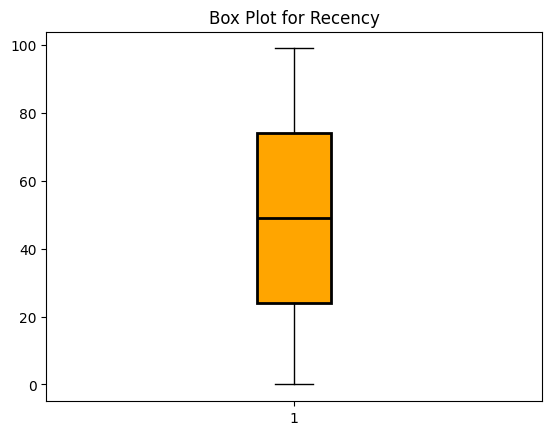

In [ ]:
plt.boxplot(x = df2['Recency'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for Recency')
plt.show()

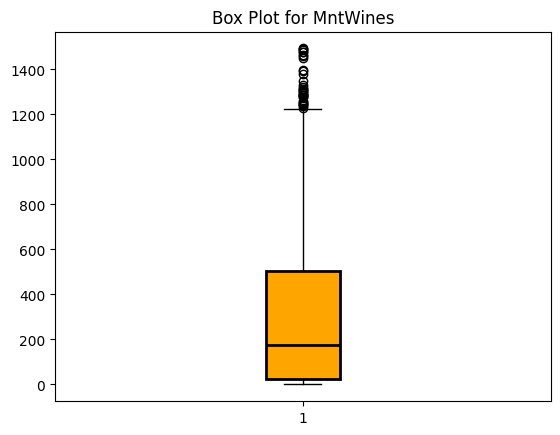

In [ ]:
plt.boxplot(x = df2['MntWines'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for MntWines')
plt.show()

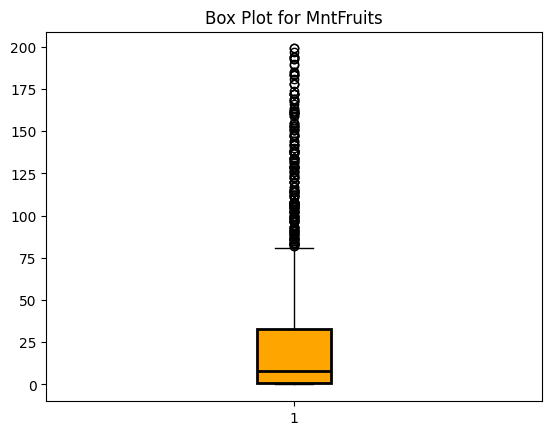

In [ ]:
plt.boxplot(x = df2['MntFruits'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for MntFruits')
plt.show()

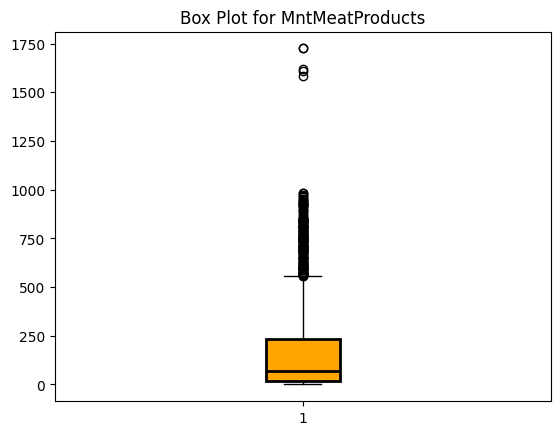

In [ ]:
plt.boxplot(x = df2['MntMeatProducts'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for MntMeatProducts')
plt.show()

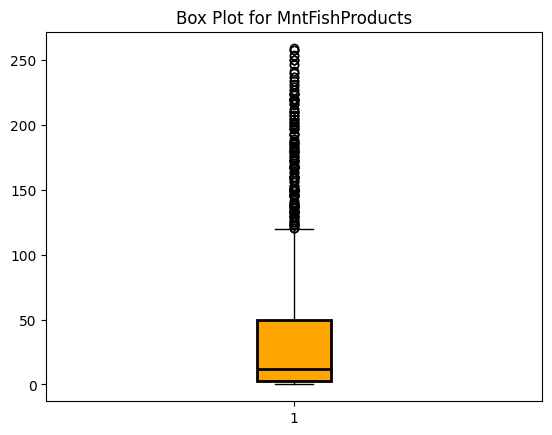

In [ ]:
plt.boxplot(x = df2['MntFishProducts'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for MntFishProducts')
plt.show()

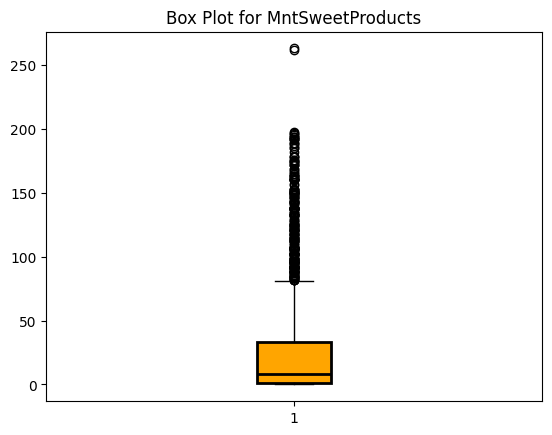

In [ ]:
plt.boxplot(x = df2['MntSweetProducts'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for MntSweetProducts')
plt.show()

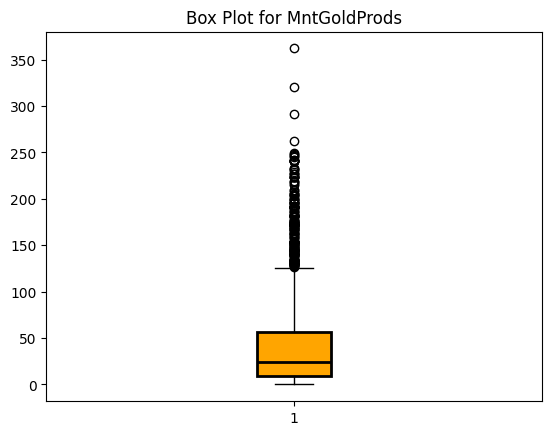

In [ ]:
plt.boxplot(x = df2['MntGoldProds'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for MntGoldProds')
plt.show()

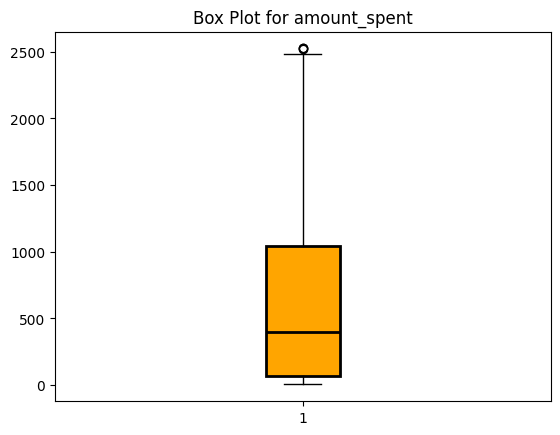

In [ ]:
plt.boxplot(x = df2['amount_spent'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for amount_spent')
plt.show()

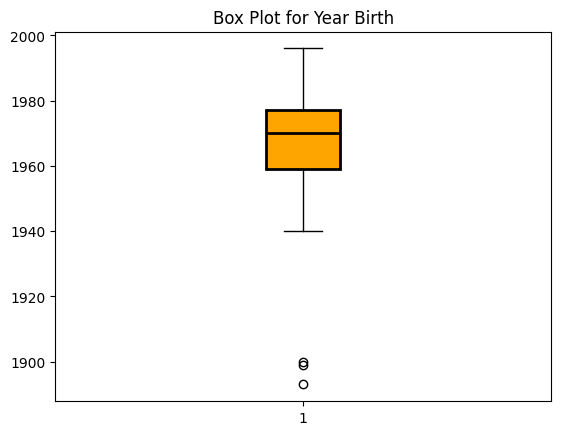

In [ ]:
plt.boxplot(x = df2['Year_Birth'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for Year Birth')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f94e6286050>,
 'caps': [<matplotlib.lines.Line2D at 0x7f94e6287750>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f94e64718d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f94e6294fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f94e6295b90>],
 'means': []}

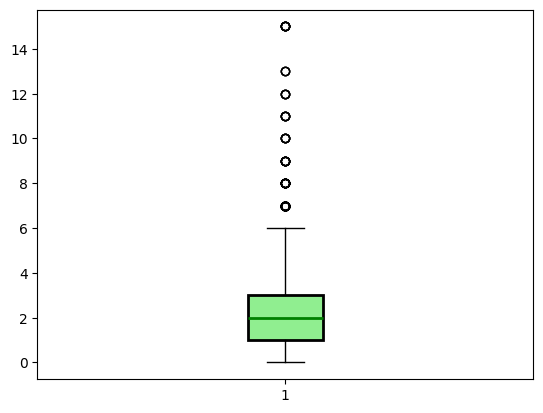

In [ ]:
plt.boxplot(x=df2["NumDealsPurchases"],patch_artist=True,boxprops=dict(facecolor="lightgreen",color='black',linewidth=2),medianprops=dict(color="green",linewidth=2))

In [ ]:
#df2['Income'] = winsorize(df2['Income'] , limits = [0.00 , 0.02])
df2['amount_spent'] = winsorize(df2['Income'] , limits = [0.00,0.2])
df2["NumDealsPurchases"]=winsorize(df2['NumDealsPurchases'],limits=[0.00,0.04])
df2['NumWebPurchases'] = winsorize(df2['NumWebPurchases'],limits=[0.00,0.04])
df2['NumCatalogPurchases'] = winsorize(df2['NumCatalogPurchases'],limits=[0.00,0.04])
df2['Year_Birth'] = winsorize(df2['Year_Birth'] , limits = [0.03,0.0])
df2['MntGoldProds'] = winsorize(df2['MntGoldProds'] , limits = [0.0,0.2])
df2['MntSweetProducts'] = winsorize(df2['MntSweetProducts'] , limits = [0.0,0.2])
df2['MntFishProducts'] = winsorize(df2['MntFishProducts'] , limits = [0.0,0.2])
df2['MntMeatProducts'] = winsorize(df2['MntMeatProducts'] , limits = [0.0,0.2])
df2['MntFruits'] = winsorize(df2['MntFruits'] , limits = [0.0,0.2])
df2['MntWines'] = winsorize(df2['MntWines'] , limits = [0.0,0.2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f94e64bdd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f94e69c2d90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f94e6470b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f94e63bdb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f94e652b110>],
 'means': []}

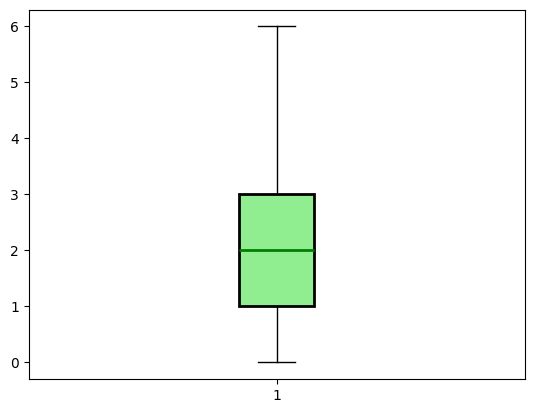

In [ ]:
plt.boxplot(x=df2["NumDealsPurchases"],patch_artist=True,boxprops=dict(facecolor="lightgreen",color='black',linewidth=2),medianprops=dict(color="green",linewidth=2))

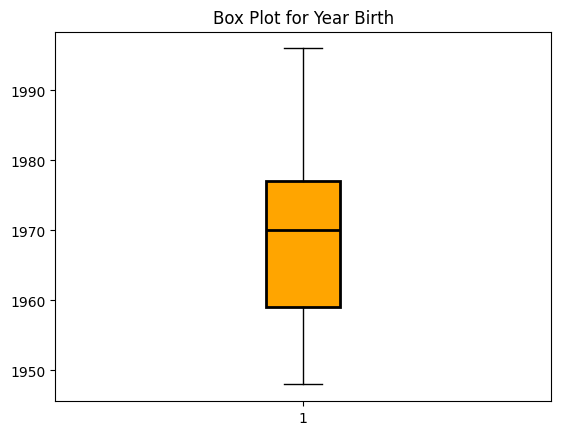

In [ ]:
plt.boxplot(x = df2['Year_Birth'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for Year Birth')
plt.show()

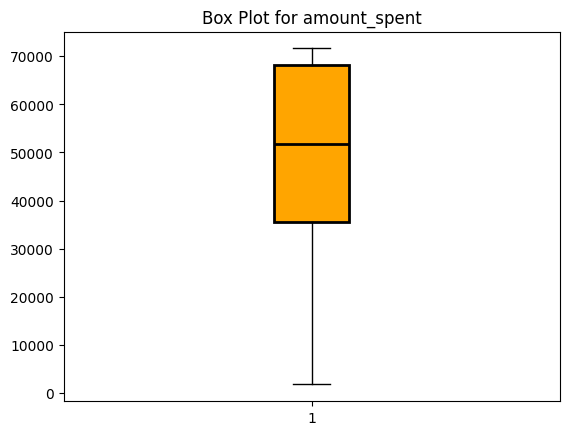

In [ ]:
plt.boxplot(x = df2['amount_spent'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for amount_spent')
plt.show()

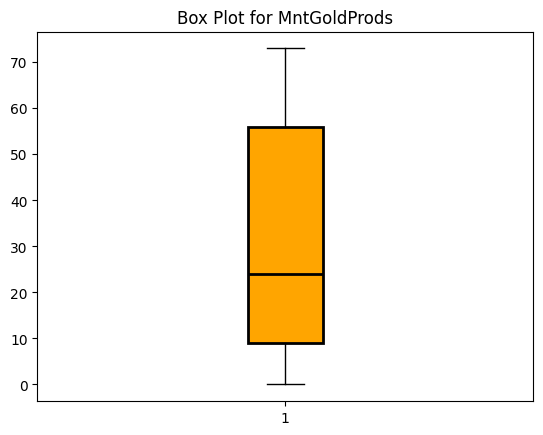

In [ ]:
plt.boxplot(x = df2['MntGoldProds'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for MntGoldProds')
plt.show()

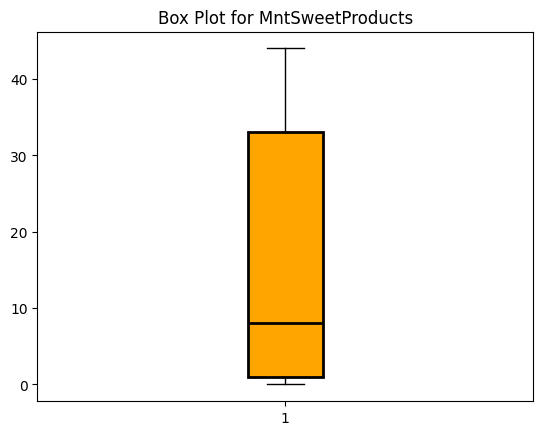

In [ ]:
plt.boxplot(x = df2['MntSweetProducts'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for MntSweetProducts')
plt.show()

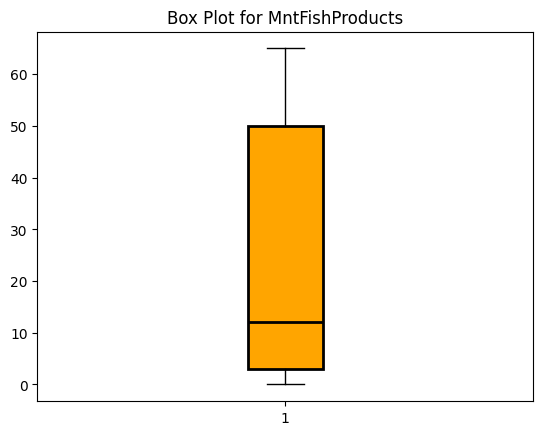

In [ ]:
plt.boxplot(x = df2['MntFishProducts'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for MntFishProducts')
plt.show()

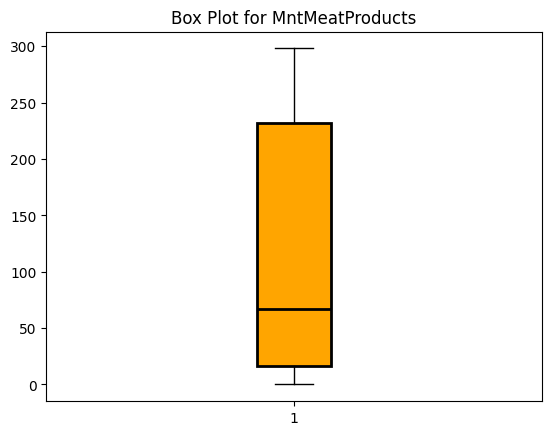

In [ ]:
plt.boxplot(x = df2['MntMeatProducts'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for MntMeatProducts')
plt.show()

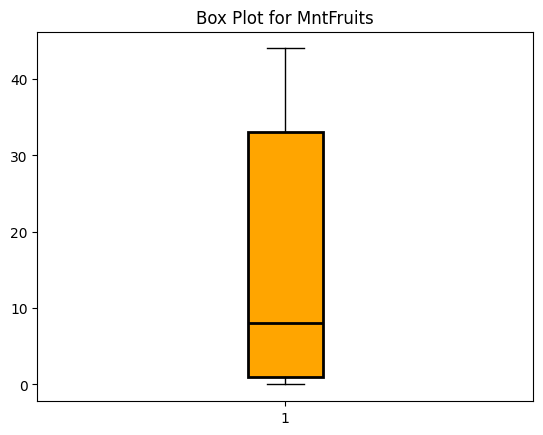

In [ ]:
plt.boxplot(x = df2['MntFruits'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for MntFruits')
plt.show()

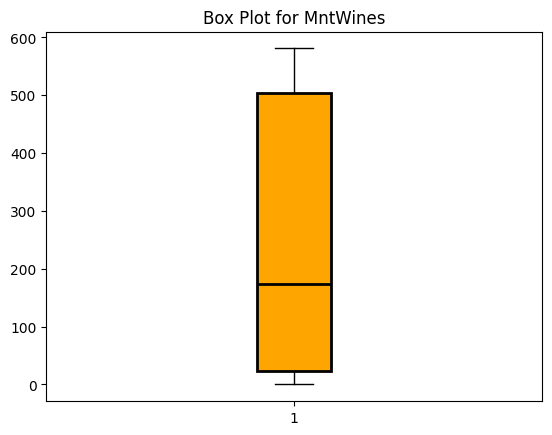

In [ ]:
plt.boxplot(x = df2['MntWines'] , patch_artist = True ,  boxprops = dict(facecolor = 'orange' , color = 'black' , linewidth = 2) , medianprops = dict(color = 'black' , linewidth = 2))
plt.title('Box Plot for MntWines')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f94e6096490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f94e60977d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f94e6095bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f94e60a4a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f94e60a5450>],
 'means': []}

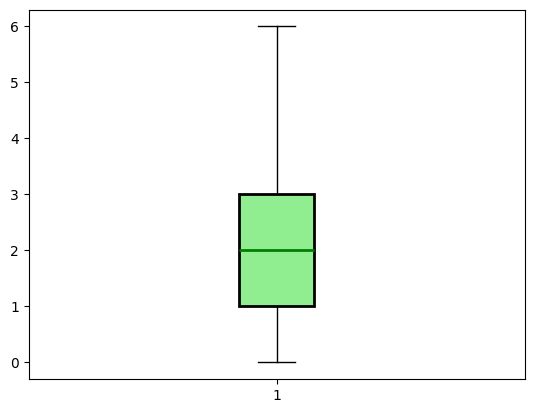

In [ ]:
plt.boxplot(x=df2["NumDealsPurchases"],patch_artist=True,boxprops=dict(facecolor="lightgreen",color="black",linewidth=2),medianprops=dict(color="green",linewidth=2))

In [ ]:
from sklearn.cluster import KMeans
ak = []
for i in range(1,11):
  k = KMeans(n_clusters = i,random_state=42)
  k.fit_predict(df1)
  ak.append(k.inertia_)

In [ ]:
ak

[1428412764997.7925,
 705688503520.9905,
 552973672050.3022,
 207045997514.02042,
 148294750609.3039,
 116133423003.87578,
 77368758169.45795,
 64604644716.99756,
 54967423033.14019,
 48099229959.23028]

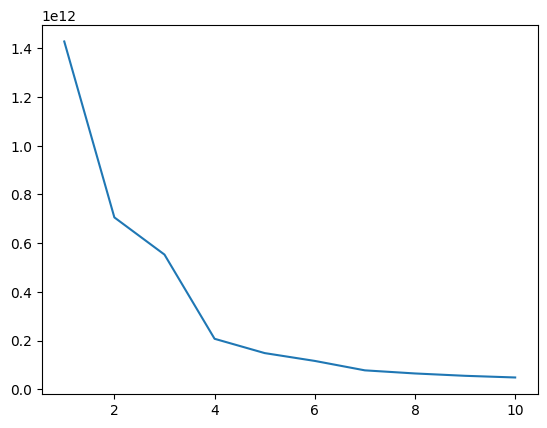

In [ ]:
plt.plot(range(1, 11), ak)


The graph shows that the "elbow" occurs at 2. This means that the first two components are the most important, and adding more won't help much.  So, we can simplify our data by focusing on just two.

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)
kmeanwithoutliers = KMeans(n_clusters=2,random_state=42)
kmeanwithoutliers.fit(df1_scaled)
df1_scaled = pd.DataFrame(df1_scaled, columns=df1.columns)
df1_scaled['cluster'] = kmeanwithoutliers.labels_
df1_scaled['cluster'].value_counts()

,count
cluster,
1,1379
0,861


In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

sil_score = silhouette_score(df1,kmeanwithoutliers.labels_)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.4511207036851497


The Silhouette Score of 0.45 indicates moderate clustering quality, suggesting some overlap between clusters. While the structure is fairly well-defined, optimizing the number of clusters or refining features could enhance separation and improve clustering performance.

In [ ]:
db_index = davies_bouldin_score( df1,kmeanwithoutliers.labels_)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.7079951786324508


The Davies-Bouldin Index of 0.71 indicates a moderate clustering performance, with some overlap between clusters. Since lower values signify better-defined and well-separated clusters.

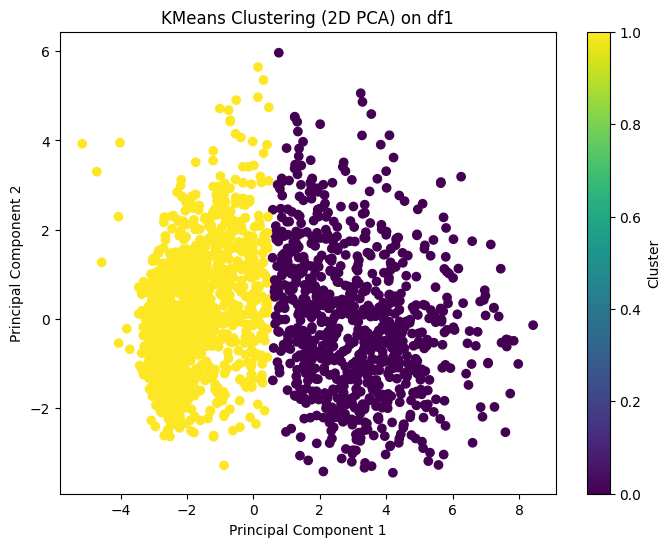

In [ ]:
pca = PCA(n_components=4)
df2_pca = pca.fit_transform(df1_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(df2_pca[:, 0], df2_pca[:, 1], c=kmeanwithoutliers.labels_, cmap='viridis')
plt.title('KMeans Clustering (2D PCA) on df1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

The 2D PCA visualization of K-Means clustering without outliers shows well-separated clusters, indicating improved segmentation. Removing outliers enhanced the clarity of group distinctions, making customer patterns more interpretable. This refined segmentation helps businesses tailor marketing strategies based on distinct customer behaviors.

In [ ]:


import plotly.express as px

pca_3d = PCA(n_components=3)
df1_pca_3d = pca_3d.fit_transform(df1_scaled)

fig = px.scatter_3d(
    x=df1_pca_3d[:, 0],
    y=df1_pca_3d[:, 1],
    z=df1_pca_3d[:, 2],
    color=kmeanwithoutliers.labels_,
    title='KMeans Clustering (3D PCA) on with outliers',
    labels={'x': 'PC 1', 'y': ' PC 2', 'z': 'PC 3'}
)
fig.show()


The 3D PCA visualization of K-Means clustering with outliers shows dispersed and overlapping clusters, indicating the presence of noise affecting segmentation quality. Outliers create distortions, making it harder to distinguish clear customer groups. This can lead to inaccurate targeting and less effective marketing strategies.

In [ ]:
from sklearn.cluster import KMeans
rk = []
for i in range(1,11):
  k = KMeans(n_clusters = i,random_state=42)
  k.fit_predict(df2)
  rk.append(k.inertia_)

In [ ]:
rk

[2160731973520.8103,
 889700311466.1667,
 645189961833.2323,
 295315360554.67017,
 202636242009.1563,
 155489770387.07315,
 114816310247.12372,
 92326898857.71815,
 75791261503.41893,
 62586963307.69735]

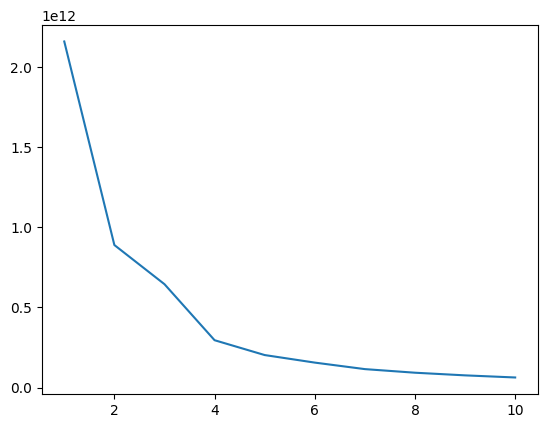

In [ ]:
plt.plot(range(1, 11), rk)

The scree plot suggests that using the two for clustering might be a good choice, as they capture the most significant variance in the data.  This could simplify clustering by reducing the dimensionality to two, potentially leading to more efficient and interpretable cluster analysis.

In [ ]:
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)
kmeanwithoutoutliers = KMeans(n_clusters=2,random_state=0)
kmeanwithoutoutliers.fit(df2_scaled)
df2_scaled = pd.DataFrame(df2_scaled, columns=df2.columns)
df2_scaled['cluster'] = kmeanwithoutoutliers.labels_
df2_scaled['cluster'].value_counts()

,count
cluster,
0,1285
1,955


In [ ]:
sil_score2 = silhouette_score(df2, kmeanwithoutoutliers.labels_)
print("Silhouette Score2:", sil_score2)

Silhouette Score2: 0.4807007871626541


The silhouette score of 0.49 suggests moderate clustering performance, with some overlap between clusters. While K-Means has identified meaningful groups, boundary points may not be well-separated.

The Silhouette Score with outliers (0.45) is lower than without outliers (0.49), indicating that outliers negatively affect clustering quality. Their presence increases variability within clusters, reducing separation. Removing outliers results in more compact and well-defined clusters, improving overall performance. Proper outlier handling can enhance clustering effectiveness.

In [ ]:
db_index2 = davies_bouldin_score(df2, kmeanwithoutoutliers.labels_)
print("Davies-Bouldin Index2:", db_index2)

Davies-Bouldin Index2: 0.6665226856377007


The Davies-Bouldin Index of 0.65 suggests a reasonably good clustering structure, with moderate separation between clusters. Lower values indicate better-defined clusters.

The Davies-Bouldin Index with outliers (0.71) is higher than without outliers (0.65), indicating that outliers reduce clustering quality. Higher values mean less distinct clusters, while lower values indicate better separation. Removing outliers improves clustering by making the groups more compact and well-defined, leading to better overall performance.

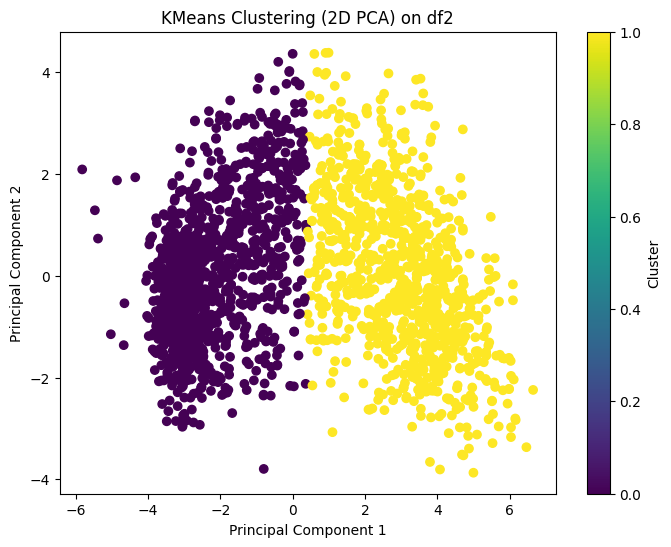

In [ ]:

pca = PCA(n_components=2)
df2_pca = pca.fit_transform(df2_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(df2_pca[:, 0], df2_pca[:, 1], c=kmeanwithoutoutliers.labels_, cmap='viridis')
plt.title('KMeans Clustering (2D PCA) on df2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


The 2D PCA visualization of K-Means clustering without outliers shows distinct and well-separated clusters, indicating improved segmentation after removing noise. The absence of outliers enhances the clarity of patterns, allowing for more meaningful customer grouping. This refined segmentation helps businesses identify and target customer segments more effectively for personalized marketing strategies.









Removing outliers improved clustering clarity, making customer segments more distinct. With outliers, clusters were scattered and less defined, while without them, segmentation became more precise, enabling better customer targeting.









In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

pca_3d = PCA(n_components=3)
df2_pca_3d = pca_3d.fit_transform(df2_scaled)

fig = px.scatter_3d(
    x=df2_pca_3d[:, 0],
    y=df2_pca_3d[:, 1],
    z=df2_pca_3d[:, 2],
    color=kmeanwithoutoutliers.labels_,
    title='KMeans Clustering (3D PCA) without outliers',
    labels={'x': 'PC 1', 'y': 'PC 2', 'z': 'PC 3'}
)
fig.show()


The 3D PCA visualization of K-Means clustering without outliers shows well-separated and more defined clusters, improving segmentation accuracy. Removing outliers reduces noise, making customer groups clearer and easier to interpret. This refined segmentation helps businesses enhance targeted marketing and personalized strategies.

The 3D PCA comparison shows that with outliers, clusters appear more dispersed and overlapping, reducing segmentation accuracy. After removing outliers, clusters become more distinct and well-defined, improving interpretability. This enhances customer profiling, enabling more precise targeting and data-driven marketing strategies.










 **DBSCAN Model**

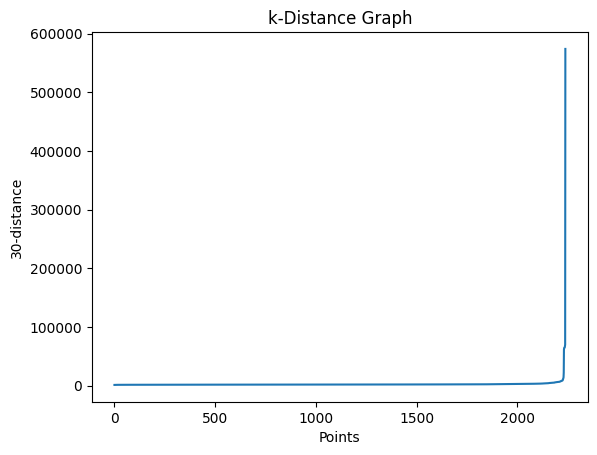

In [ ]:
k = 30
from sklearn.neighbors import NearestNeighbors
features = df.drop(columns=['ID']).columns
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(df)
distances, indices = neighbors.kneighbors(df)
sorted_distances = np.sort(distances[:, -1])
plt.plot(sorted_distances)
plt.xlabel('Points')
plt.ylabel(f'{k}-distance')
plt.title('k-Distance Graph')
plt.show()

The elbow graph from K-Nearest Neighbors (KNN) helps identify the optimal eps for DBSCAN by showing where the k-distance curve has a sharp bend. In your case, the graph likely indicated that eps = 2700 is the best choice, as lower values formed a single cluster, while higher values could merge distinct groups. This approach ensures DBSCAN captures meaningful patterns while minimizing noise.









In [ ]:
from sklearn.cluster import DBSCAN
X = df.drop(columns=['ID'])
dbscan = DBSCAN(eps=2700, min_samples=58)
dbscan.fit(df)
df['DBSCAN_Cluster'] = dbscan.labels_
print(df['DBSCAN_Cluster'].value_counts())


DBSCAN_Cluster
 0    1834
-1     406
Name: count, dtype: int64


In [ ]:
sil_score3 = silhouette_score(df,dbscan.labels_)
print("Silhouette Score:", sil_score3)

Silhouette Score: 0.3700136721166087


The silhouette score of 0.37 for the DBSCAN clustering model suggests that the clusters have moderate cohesion and separation. This indicates that while some clusters are well-formed, there may be noise points or overlapping clusters affecting the overall quality.

In [ ]:
db_index3 = davies_bouldin_score(df,dbscan.labels_)
print("Davies-Bouldin Index2:", db_index3)

Davies-Bouldin Index2: 12.169268262067622


The Davies-Bouldin Index (DBI) of 12.17 indicates that the clusters in the DBSCAN model are not well-separated and may have significant overlap. A lower DBI value is preferred, as it signifies better-defined and more compact clusters.

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning:

invalid value encountered in sqrt



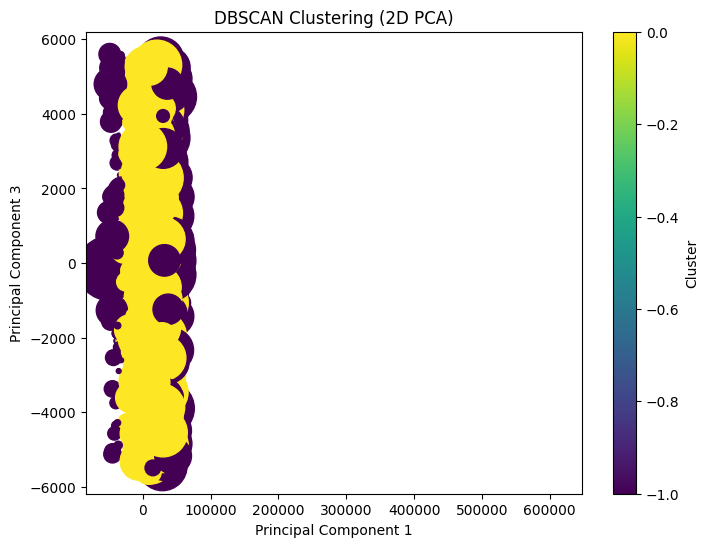

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1],df_pca[:, 2], c=df['DBSCAN_Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import plotly.express as px
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)
fig = px.scatter_3d(
    x=df_pca[:, 0],
    y=df_pca[:, 1],
    z=df_pca[:, 2],
    color=df['DBSCAN_Cluster'],
    title='DBSCAN Clustering (3D PCA)',
    labels={'x': 'PC 1', 'y': 'PC 2', 'z': 'PC 3'},
)
fig.show()

# **Conclusion**




*   K-Means without outliers is the best clustering model for customer segmentation.
*   DBSCAN struggles with noise and overlapping clusters, leading to poor separation.

*   K-Means with outliers faces issues as outliers create overlapping clusters, reducing clarity.

*   Removing outliers enhances the compactness and distinctiveness of clusters.

*   This leads to better-defined segments, improving the accuracy of customer insights.
*   K-Means without outliers is the most effective for customer profiling and targeted marketing.


*   A well-separated clustering structure enables businesses to personalize strategies and optimize decision-making.



